In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
le= LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [5]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr_model = LinearRegression()

In [7]:
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [8]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [9]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [10]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [11]:
print("Linear Regression Model:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R^2 Score: {r2_lr}\n")

print("Decision Tree Regressor Model:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")

Linear Regression Model:
Mean Squared Error: 4.105609215835833
R^2 Score: 0.9880686410711422

Decision Tree Regressor Model:
Mean Squared Error: 8.879708333333332
R^2 Score: 0.9741945758256975


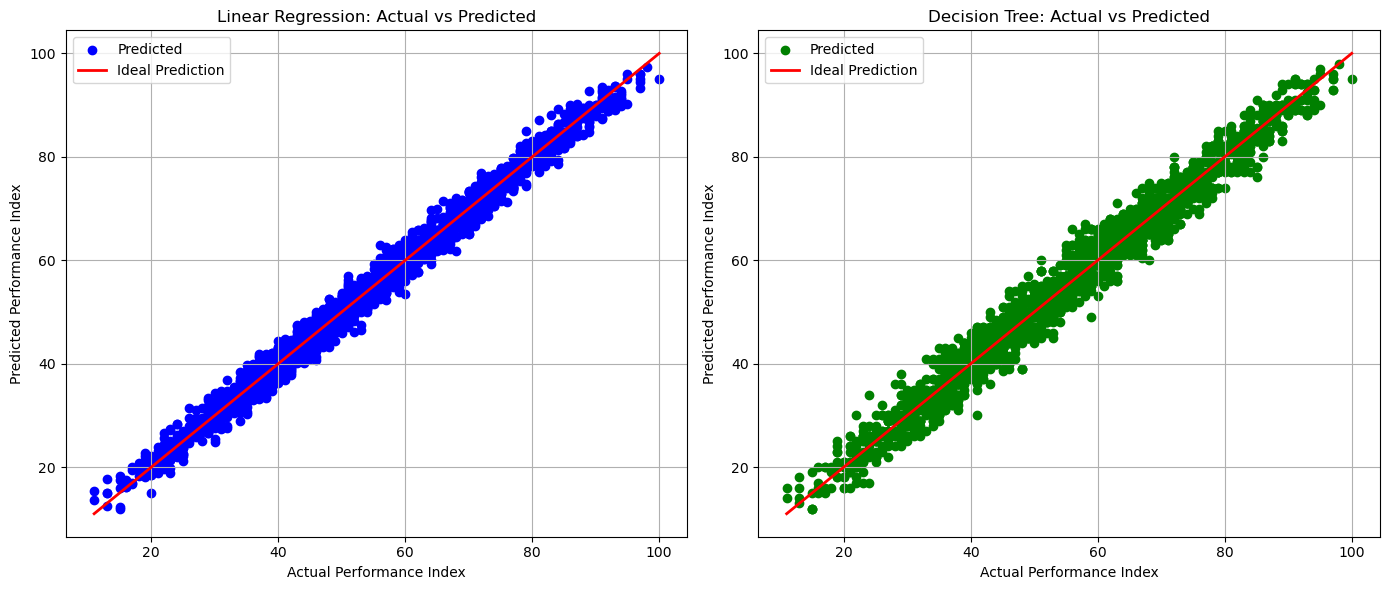

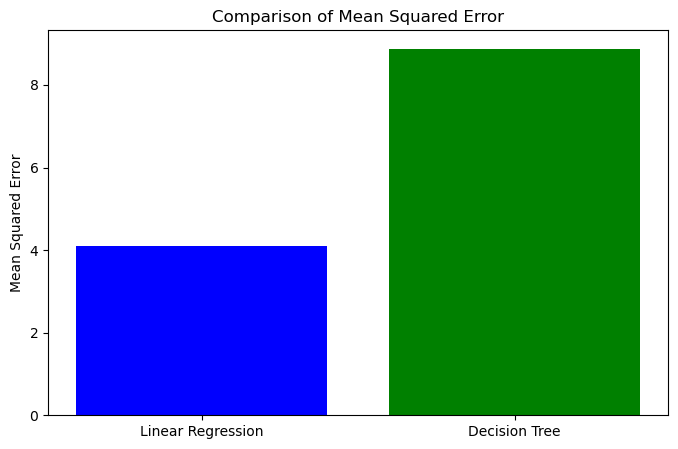

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual vs predicted values for both models
plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Prediction')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.legend()
plt.grid(True)

# Plot for Decision Tree Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='green', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Prediction')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Bar plot for MSE comparison
models = ['Linear Regression', 'Decision Tree']
mse_values = [mse_lr, mse_dt]

plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Comparison of Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.show()
